In [2]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from prophet import Prophet

%matplotlib inline

In [26]:
# Upload the bitcoin_hourly.csv file
from google.colab import files
uploaded = files.upload()

Saving ford2.csv to ford2.csv


In [27]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("ford2.csv",
                 index_col="date",
                 infer_datetime_format=True,
                 parse_dates=True
                )

# Drop columns that won't be used
df = df.drop("volume", axis=1)

# Preview the dataset
df.head()

,close
date,
2022-07-14,11.39
2022-07-15,11.88
2022-07-18,11.96
2022-07-19,12.59
2022-07-20,12.73


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
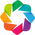

:Curve   [date]   (close)

In [28]:
# Set `bokeh` to render hvPlot charts
hv.extension("bokeh")

# Use hvPlot to visually inspect the price data
df["close"].hvplot()

## Step 3: Label the columns `ds` and `y` so that the syntax is recognized by Prophet

In [29]:
# Reset the index so that we recode the columns for Prophet
df = df.reset_index()

In [30]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df.columns = ["ds", "y"]

## Step 4:  View dataframe shape, and the first and last five rows of the  DataFrame

In [ ]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(df.shape)
display(df.head())
display(df.tail())

(30748, 2)

,ds,y
0,2017-08-17 05:00:00,4315.32
1,2017-08-17 06:00:00,4324.35
2,2017-08-17 07:00:00,4349.99
3,2017-08-17 08:00:00,4360.69
4,2017-08-17 09:00:00,4444.00


,ds,y
30743,2021-02-12 01:00:00,48477.50
30744,2021-02-12 02:00:00,47935.66
30745,2021-02-12 03:00:00,47587.31
30746,2021-02-12 04:00:00,47271.55
30747,2021-02-12 05:00:00,47398.79


## Step 5:  Sort the DataFrame by `ds` in ascending order, so as to arrange the data chronologically from past to present. With that done, visually inspect the price data using `hvplot`

In [31]:
# Sort the DataFrame by `ds` in ascending order
df = df.sort_values(by=["ds"], ascending=True)

# Display sample data from head and tail
display(df.head(10))
display(df.tail(10))

,ds,y
0,2022-07-14,11.39
1,2022-07-15,11.88
2,2022-07-18,11.96
3,2022-07-19,12.59
4,2022-07-20,12.73
5,2022-07-21,13.00
6,2022-07-22,12.82
7,2022-07-25,12.84
8,2022-07-26,12.54
9,2022-07-27,13.19


,ds,y
194,2023-04-21,11.81
195,2023-04-24,12.16
196,2023-04-25,11.77
197,2023-04-26,11.54
198,2023-04-27,11.61
199,2023-04-28,11.88
200,2023-05-01,12.06
201,2023-05-02,11.80
202,2023-05-03,11.79
203,2023-05-04,11.56


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
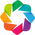

:Curve   [index]   (y)

In [32]:
# Set `bokeh` to render hvPlot charts
hv.extension("bokeh")

# Diplay the data using hvPlot
df.hvplot()

## Step 6: Call the `Prophet` function, and store it as an object

In [33]:
# Call the Prophet function, store as an object
model = Prophet()
model

## Step 7: Fit the Prophet model.

In [34]:
# Fit the Prophet model.
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvqlp5jt/5zqrtp70.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyvqlp5jt/udk2yb50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17679', 'data', 'file=/tmp/tmpyvqlp5jt/5zqrtp70.json', 'init=/tmp/tmpyvqlp5jt/udk2yb50.json', 'output', 'file=/tmp/tmpyvqlp5jt/prophet_modeld3jk14za/prophet_model-20230831224616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:46:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:46:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Step 8: Create a `future_trends` dataframe to hold predictions, using the `make_future_dataframe` function. (Make the prediction go out as far as 1,000 hours)

In [35]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model.make_future_dataframe(periods=1000, freq="H")

# View the last five rows of the predictions
future_trends.tail()

,ds
1199,2023-06-14 12:00:00
1200,2023-06-14 13:00:00
1201,2023-06-14 14:00:00
1202,2023-06-14 15:00:00
1203,2023-06-14 16:00:00


## Step 9: Make the predictions for the trend data using the `future_trends` DataFrame, and preview the first five rows of the DataFrame

In [36]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-14,13.940231,13.129702,15.802172,13.940231,13.940231,0.485225,0.485225,0.485225,0.485225,0.485225,0.485225,0.0,0.0,0.0,14.425455
1,2022-07-15,13.935242,13.069339,15.708173,13.935242,13.935242,0.475689,0.475689,0.475689,0.475689,0.475689,0.475689,0.0,0.0,0.0,14.410931
2,2022-07-18,13.920278,13.119549,15.746520,13.920278,13.920278,0.560130,0.560130,0.560130,0.560130,0.560130,0.560130,0.0,0.0,0.0,14.480408
3,2022-07-19,13.915290,13.145607,15.701543,13.915290,13.915290,0.509379,0.509379,0.509379,0.509379,0.509379,0.509379,0.0,0.0,0.0,14.424668
4,2022-07-20,13.910301,13.096321,15.766708,13.910301,13.910301,0.532446,0.532446,0.532446,0.532446,0.532446,0.532446,0.0,0.0,0.0,14.442747


## Step 10: Plot the Prophet predictions for the `forecast_trends` data

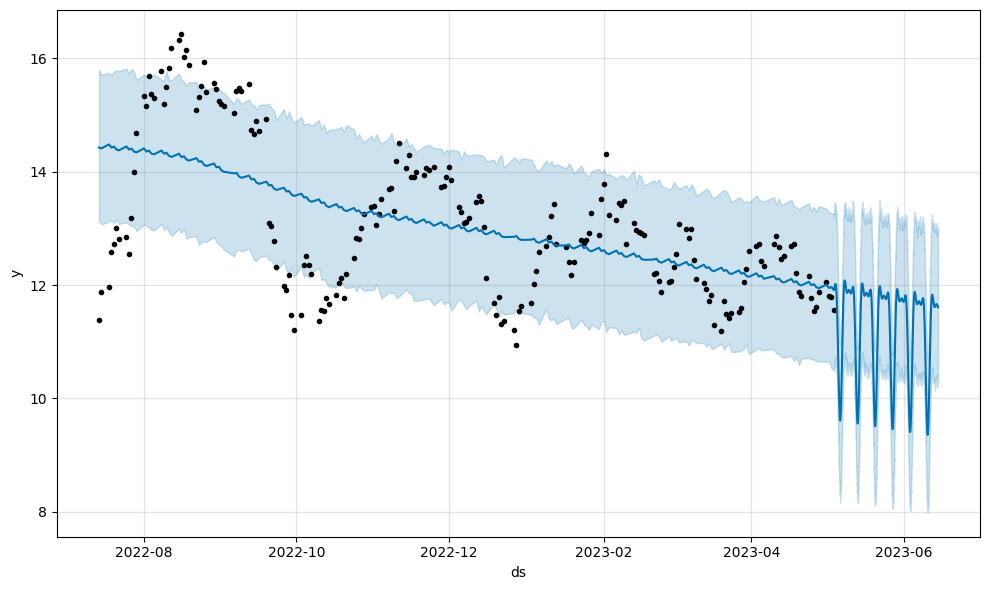

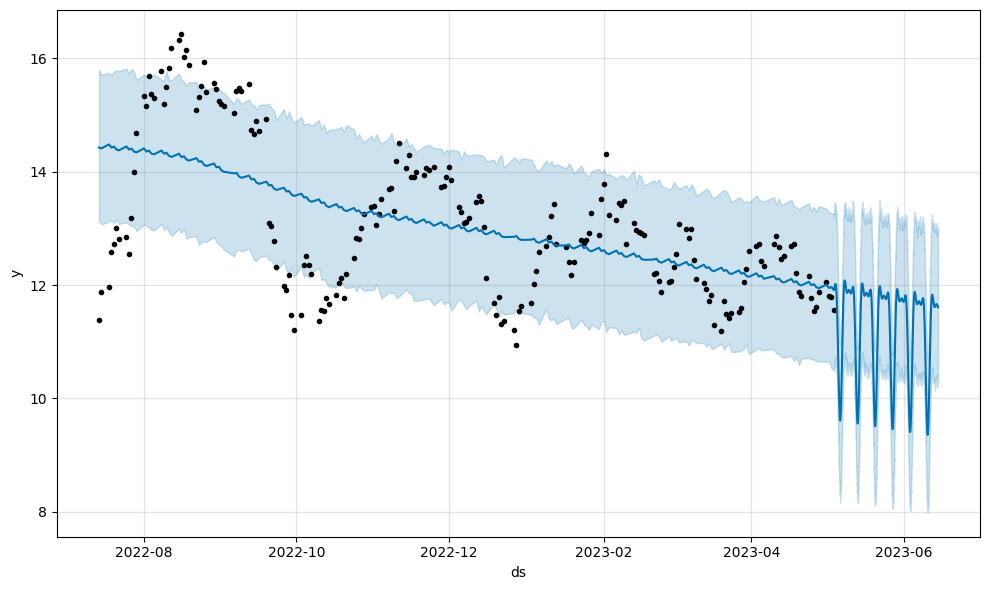

In [37]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_trends)

## Step 11: Use the `plot_components` function to visualize the forecast results

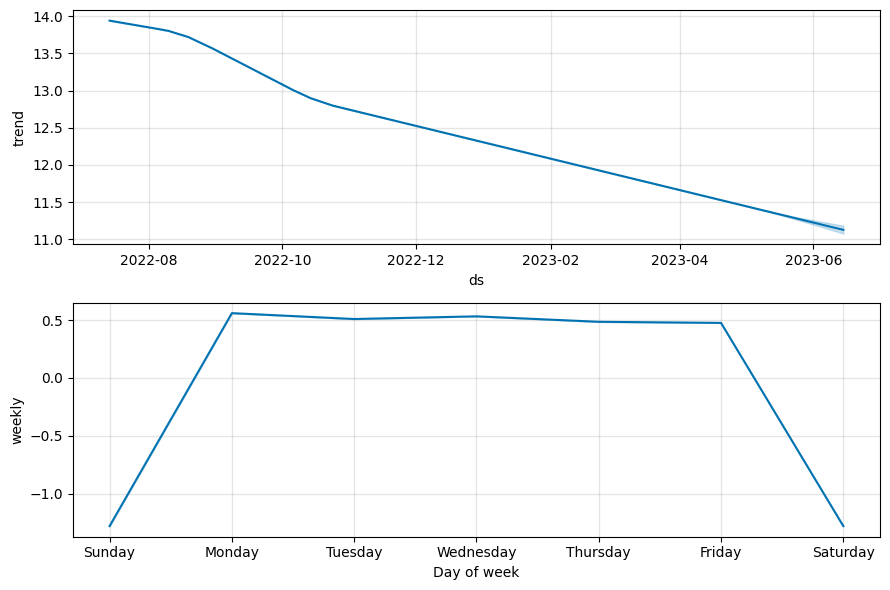

In [38]:
# Use the plot_components function to visualize the forecast results
figures = model.plot_components(forecast_trends)

## Step 12: Set the `datetime` index of the `forecast_trends` data, using the `ds` column

In [39]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(["ds"])
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2022-07-14,13.940231,13.129702,15.802172,13.940231,13.940231,0.485225,0.485225,0.485225,0.485225,0.485225,0.485225,0.0,0.0,0.0,14.425455
2022-07-15,13.935242,13.069339,15.708173,13.935242,13.935242,0.475689,0.475689,0.475689,0.475689,0.475689,0.475689,0.0,0.0,0.0,14.410931
2022-07-18,13.920278,13.119549,15.746520,13.920278,13.920278,0.560130,0.560130,0.560130,0.560130,0.560130,0.560130,0.0,0.0,0.0,14.480408
2022-07-19,13.915290,13.145607,15.701543,13.915290,13.915290,0.509379,0.509379,0.509379,0.509379,0.509379,0.509379,0.0,0.0,0.0,14.424668
2022-07-20,13.910301,13.096321,15.766708,13.910301,13.910301,0.532446,0.532446,0.532446,0.532446,0.532446,0.532446,0.0,0.0,0.0,14.442747


## Step 13: From the `forecast_trends` DataFrame, use `hvPlot` to visualize the `yhat`, `yhat_lower`, and `yhat_upper` columns over the last 10 days (i.e., the last 240 rows)

* `yhat` represents the most likely (average) forecast.

* `yhat_lower` and `yhat_upper` represents the worst and best case prediction.

    * These are based on what are known as 80% confidence intervals.

In [40]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240)
forecast_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-240:, :].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

## Step 14: Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month. The DataFrame should include the columns `yhat_upper`, `yhat_lower`, and `yhat`. Replace the column names to something less technical sounding: `Best Case`, `Worst Case`, and `Most Likely Case`, respectively

In [43]:
# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_march_2021 = forecast_trends.loc["2022-03-01":"2023-05-01"][["yhat_upper", "yhat_lower", "yhat"]]

# Replace the column names to something less technical sounding
forecast_march_2021 = forecast_march_2021.rename(
    columns={
        "yhat_upper": "Best Case",
        "yhat_lower": "Worst Case",
        "yhat": "Most Likely Case"
    }
)

# Review the last five rows of the DataFrame
forecast_march_2021.tail()

,Best Case,Worst Case,Most Likely Case
ds,,,
2023-04-25,13.304134,10.688439,11.998940
2023-04-26,13.378893,10.687448,12.014855
2023-04-27,13.294851,10.653592,11.960481
2023-04-28,13.392669,10.653117,11.943794
2023-05-01,13.350018,10.646582,12.006778


## Step 15: Display the average forecasted price for March 2021

In [44]:
# Display the average forecasted price for March 2021
forecast_march_2021.mean()

Best Case           14.456385
Worst Case          11.763653
Most Likely Case    13.110543
dtype: float64